In [105]:
from preprocessing import load_data
import pandas as pd
from tqdm import tqdm
from collections import Counter,defaultdict
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = load_data()

In [3]:
type(data)

list

In [4]:
print(data[:1])

[{'id': 10259, 'cuisine': 'greek', 'ingredients': ['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']}]


In [5]:
total_ing_cnt = Counter()
total_cousine_cnt = Counter()
cousine_wise_ing_cnt = defaultdict(Counter) 

for datapoint in tqdm(data):
    cuisine = datapoint['cuisine']
    total_cousine_cnt[cuisine] += 1
    for ing in datapoint['ingredients']:
        
        total_ing_cnt[ing] += 1
        cousine_wise_ing_cnt[cuisine][ing] += 1







100%|██████████| 39774/39774 [00:00<00:00, 104318.62it/s]


In [6]:
cousine_type_cnt = len(total_cousine_cnt)
cousine_type_cnt

20

In [7]:
ttl_csn_cnt_list = list(zip(*total_cousine_cnt.most_common(cousine_type_cnt)))
type(ttl_csn_cnt_list[0])

tuple

In [8]:
def plot_bar(zip_list):
    to_plot_lists = list(zip(*zip_list))
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=[16,9])
    plt.xticks(rotation= 45)
    plt.bar(to_plot_lists[0],to_plot_lists[1])

<BarContainer object of 20 artists>

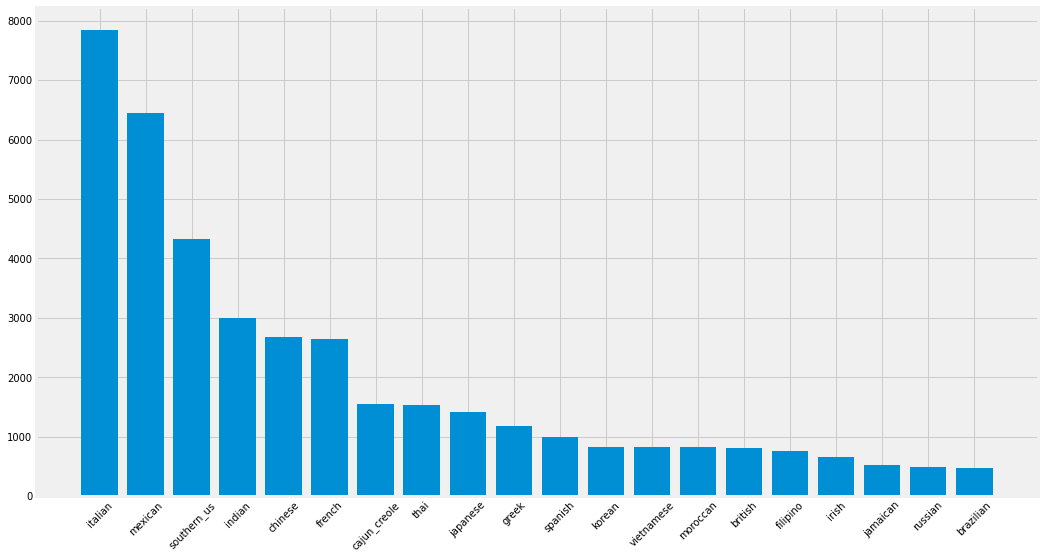

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=[16,9])
plt.xticks(rotation= 45)
plt.bar(ttl_csn_cnt_list[0],ttl_csn_cnt_list[1])

In [10]:
len(total_ing_cnt)

6714

<BarContainer object of 30 artists>

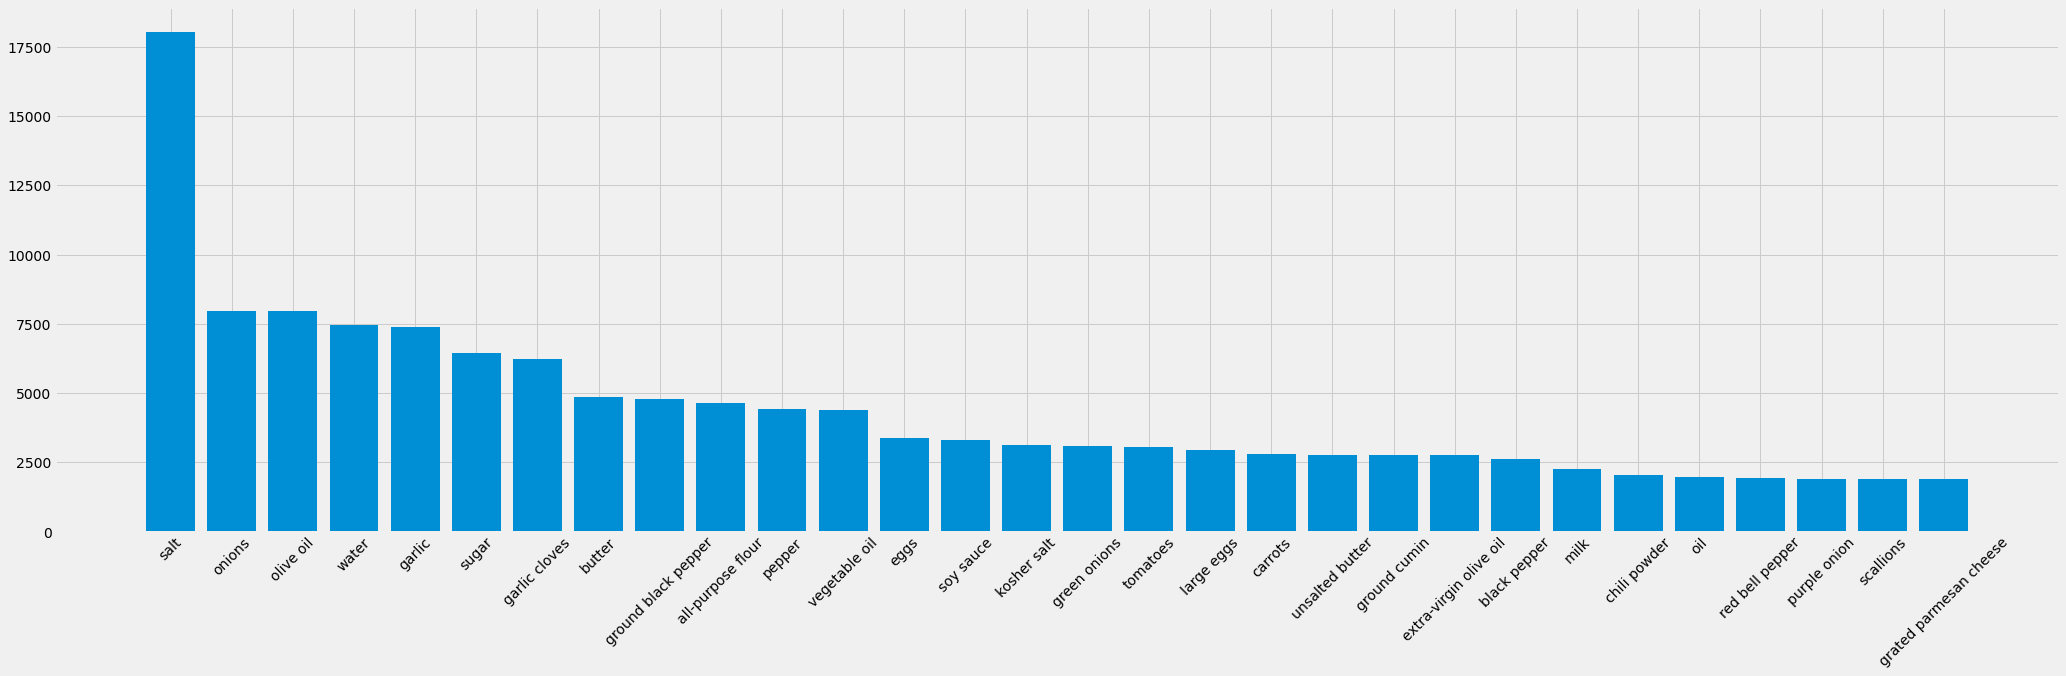

In [11]:
tic = list(zip(*total_ing_cnt.most_common(30)))
plt.style.use('fivethirtyeight')
plt.figure(figsize=[32,9])
plt.xticks(rotation= 45)
plt.bar(tic[0],tic[1])

{'greek': 11964, 'southern_us': 41623, 'filipino': 7550, 'indian': 38156, 'jamaican': 6425, 'spanish': 10309, 'italian': 77667, 'mexican': 70029, 'chinese': 32030, 'british': 7806, 'thai': 19308, 'vietnamese': 10457, 'cajun_creole': 19506, 'brazilian': 4446, 'french': 25978, 'japanese': 13853, 'irish': 6203, 'korean': 9366, 'moroccan': 10599, 'russian': 5000}


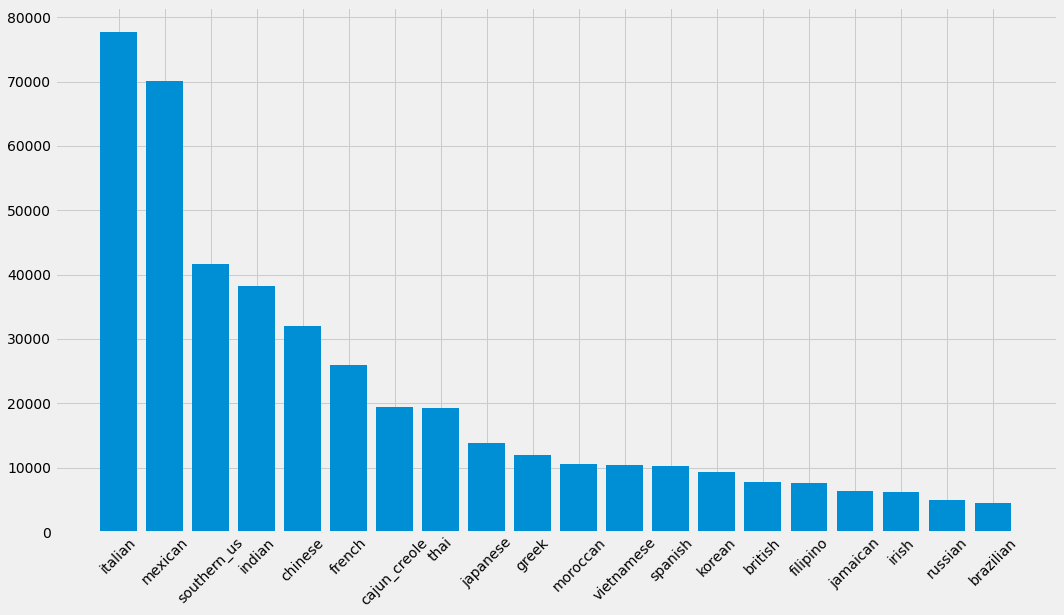

In [12]:
cuisines = list(total_cousine_cnt)
cnt_dict = {}
for cuisine in cuisines:
    cnt_dict[cuisine] = sum(cousine_wise_ing_cnt[cuisine].values())
print(cnt_dict)
total_count_of_ings_per_cuisine = Counter(cnt_dict)
plot_bar(total_count_of_ings_per_cuisine.most_common(len(cuisines)))

In [13]:
for cuisine in cuisines:
    print(cuisine)
    print([ (ing, cnt/ total_cousine_cnt[cuisine]) for ing ,cnt in cousine_wise_ing_cnt[cuisine].most_common(20)])


greek
[('salt', 0.4868085106382979), ('olive oil', 0.428936170212766), ('dried oregano', 0.2272340425531915), ('garlic cloves', 0.21617021276595744), ('feta cheese crumbles', 0.214468085106383), ('extra-virgin olive oil', 0.19489361702127658), ('fresh lemon juice', 0.18893617021276596), ('ground black pepper', 0.18808510638297873), ('garlic', 0.18382978723404256), ('pepper', 0.1727659574468085), ('feta cheese', 0.1625531914893617), ('cucumber', 0.15914893617021278), ('purple onion', 0.15829787234042553), ('onions', 0.1574468085106383), ('lemon juice', 0.15574468085106383), ('tomatoes', 0.1327659574468085), ('water', 0.12170212765957447), ('lemon', 0.1097872340425532), ('fresh parsley', 0.09617021276595744), ('fresh dill', 0.09191489361702128)]
southern_us
[('salt', 0.5300925925925926), ('butter', 0.29050925925925924), ('all-purpose flour', 0.2828703703703704), ('sugar', 0.2439814814814815), ('large eggs', 0.1726851851851852), ('baking powder', 0.16875), ('water', 0.1587962962962963), (

In [14]:
weighted_total_ing_cnt = defaultdict(float)
for ing in total_ing_cnt.keys():
    for cuisine in cuisines:
        weighted_total_ing_cnt[ing] += cousine_wise_ing_cnt[cuisine][ing] / total_cousine_cnt[cuisine]
        

In [15]:
Counter(weighted_total_ing_cnt).most_common(20)

[('salt', 9.208604969807777),
 ('onions', 4.528463261779844),
 ('water', 4.273750446343674),
 ('garlic', 3.8574155736676556),
 ('sugar', 3.8533896075350915),
 ('olive oil', 3.4505503560981117),
 ('garlic cloves', 3.138192581807587),
 ('pepper', 2.40896241048556),
 ('butter', 2.3967485815715475),
 ('ground black pepper', 2.3952248411436408),
 ('vegetable oil', 2.3849828295877624),
 ('soy sauce', 2.345069005992305),
 ('all-purpose flour', 2.303509252669783),
 ('carrots', 2.0310742937835093),
 ('eggs', 1.9882134770303665),
 ('green onions', 1.8192925408044656),
 ('kosher salt', 1.453862404850056),
 ('large eggs', 1.4277649789043965),
 ('unsalted butter', 1.412847021805164),
 ('black pepper', 1.3939419486784066)]

In [16]:
ns_total_ing_cnt = Counter()
ns_total_cousine_cnt = Counter()
ns_cousine_wise_ing_cnt = defaultdict(Counter) 

for datapoint in tqdm(data):
    cuisine = datapoint['cuisine']
    if 'salt' not in datapoint['ingredients']:
        ns_total_cousine_cnt[cuisine] += 1
        for ing in datapoint['ingredients']:
            ns_total_ing_cnt[ing] += 1
            ns_cousine_wise_ing_cnt[cuisine][ing] += 1


100%|██████████| 39774/39774 [00:00<00:00, 168538.79it/s]


In [17]:
weighted_total_ing_cnt = defaultdict(float)
for ing in ns_total_ing_cnt.keys():
    for cuisine in cuisines:
        weighted_total_ing_cnt[ing] += ns_cousine_wise_ing_cnt[cuisine][ing] / ns_total_cousine_cnt[cuisine]

In [18]:
Counter(weighted_total_ing_cnt).most_common(20)


[('onions', 3.739617429663889),
 ('sugar', 3.7131921717553737),
 ('water', 3.618249303436326),
 ('garlic', 3.4128786274223497),
 ('olive oil', 3.082130997504109),
 ('garlic cloves', 2.946626512499304),
 ('kosher salt', 2.645441007797479),
 ('soy sauce', 2.4412657684431514),
 ('vegetable oil', 2.1511128988256534),
 ('ground black pepper', 1.9966766510891631),
 ('carrots', 1.9317023321054008),
 ('butter', 1.8921762928252428),
 ('green onions', 1.7736468920622248),
 ('eggs', 1.5477713617982882),
 ('all-purpose flour', 1.4560602230140383),
 ('scallions', 1.333758582891103),
 ('unsalted butter', 1.3189164206080313),
 ('extra-virgin olive oil', 1.198814706203029),
 ('sesame oil', 1.195070035681972),
 ('fish sauce', 1.1507711129865086)]

In [30]:
cuisine_df = pd.DataFrame(cousine_wise_ing_cnt).fillna(0)

In [31]:
cuisine_df['total_use'] = total_ing_cnt
cuisine_df['total_use']

romaine lettuce                 270
black olives                    229
grape tomatoes                  228
garlic                         7380
pepper                         4438
                               ... 
beluga lentil                     1
bermuda onion                     1
snip fresh dill                   1
wild asparagus                    1
cocktail pumpernickel bread       1
Name: total_use, Length: 6714, dtype: int64

In [33]:
cuisine_df = cuisine_df[cuisine_df.total_use >= 10] 
cuisine_df['brazilian']

romaine lettuce        0.0
black olives           0.0
grape tomatoes         0.0
garlic                82.0
pepper                56.0
                      ... 
dashi powder           0.0
tonkatsu sauce         0.0
rice syrup             0.0
gochugaru              0.0
korean chile paste     0.0
Name: brazilian, Length: 2400, dtype: float64

In [34]:
for cuisine in cuisines:
    cuisine_df[f'{cuisine}_ratio'] = cuisine_df[cuisine].apply(lambda x : x / total_cousine_cnt[cuisine])

cuisine_df.describe()

,greek,southern_us,filipino,indian,jamaican,spanish,italian,mexican,chinese,british,...,thai_ratio,vietnamese_ratio,cajun_creole_ratio,brazilian_ratio,french_ratio,japanese_ratio,irish_ratio,korean_ratio,moroccan_ratio,russian_ratio
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,4.860417,16.767500,3.026667,15.602500,2.588750,4.178333,31.467500,28.439583,12.990833,3.071250,...,0.005121,0.005120,0.005112,0.003778,0.003931,0.003888,0.003703,0.004573,0.005281,0.004093
std,24.612683,81.360699,18.087512,74.891286,12.608894,19.440954,142.172666,122.012059,64.478017,15.502004,...,0.021033,0.023125,0.022544,0.017208,0.017431,0.018541,0.020016,0.026235,0.026136,0.021738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000378,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,8.000000,1.000000,4.250000,1.000000,2.000000,14.000000,10.000000,5.000000,1.000000,...,0.001949,0.001212,0.001940,0.002141,0.001890,0.001405,0.001499,0.001205,0.001218,0.002045
max,572.000000,2290.000000,421.000000,1934.000000,332.000000,460.000000,3454.000000,2720.000000,1363.000000,407.000000,...,0.406108,0.475152,0.480595,0.415418,0.454649,0.394238,0.563718,0.514458,0.503045,0.588957


In [44]:
#cuisines
europeans = ['greek','spanish','italian','french','irish','british','russian','moroccan']
americans = ['southern_us','jamaican','mexican','brazilian','cajun_creole']
asians = ['filipino','indian','thai','vietnamese','japanese','korean','chinese']


In [39]:
def rlist(l):
   return [f'{c}_ratio' for c in l] 

array([[<AxesSubplot: xlabel='greek_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='spanish_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='italian_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='french_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='irish_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='british_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='russian_ratio', ylabel='greek_ratio'>,
        <AxesSubplot: xlabel='moroccan_ratio', ylabel='greek_ratio'>],
       [<AxesSubplot: xlabel='greek_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='spanish_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='italian_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='french_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='irish_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='british_ratio', ylabel='spanish_ratio'>,
        <AxesSubplot: xlabel='

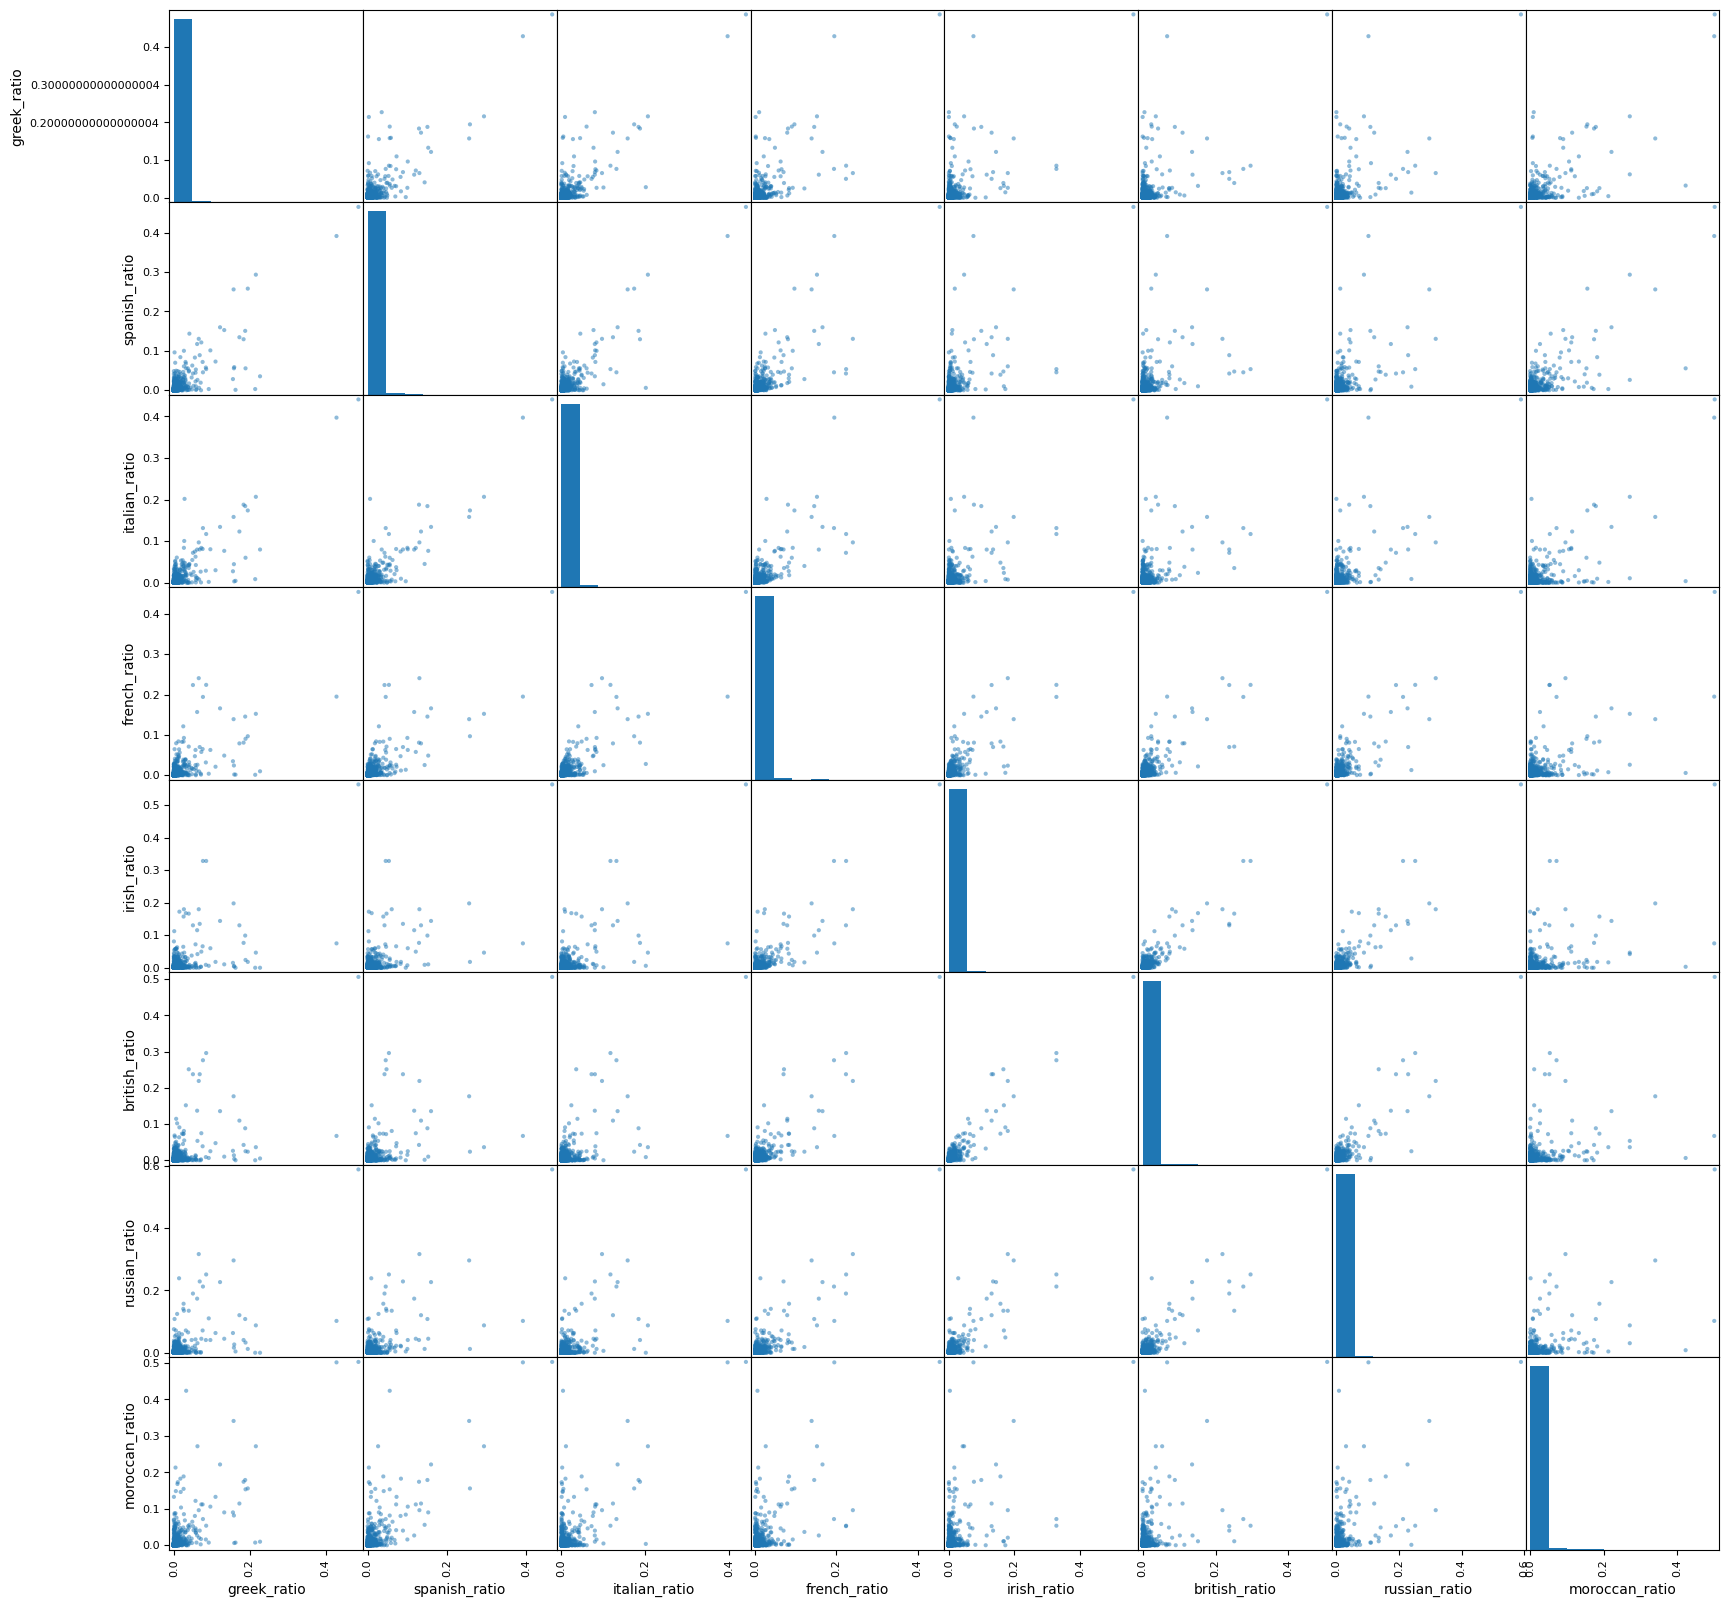

In [51]:
plt.style.use('default')

#cuisine_df[r_cuisines]
pd.plotting.scatter_matrix(cuisine_df[rlist(europeans)],figsize=[20,20],grid = True)

array([[<AxesSubplot: xlabel='filipino_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='indian_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='thai_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='vietnamese_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='japanese_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='korean_ratio', ylabel='filipino_ratio'>,
        <AxesSubplot: xlabel='chinese_ratio', ylabel='filipino_ratio'>],
       [<AxesSubplot: xlabel='filipino_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='indian_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='thai_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='vietnamese_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='japanese_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='korean_ratio', ylabel='indian_ratio'>,
        <AxesSubplot: xlabel='chinese_ratio', ylabel='indian_ratio'>],
    

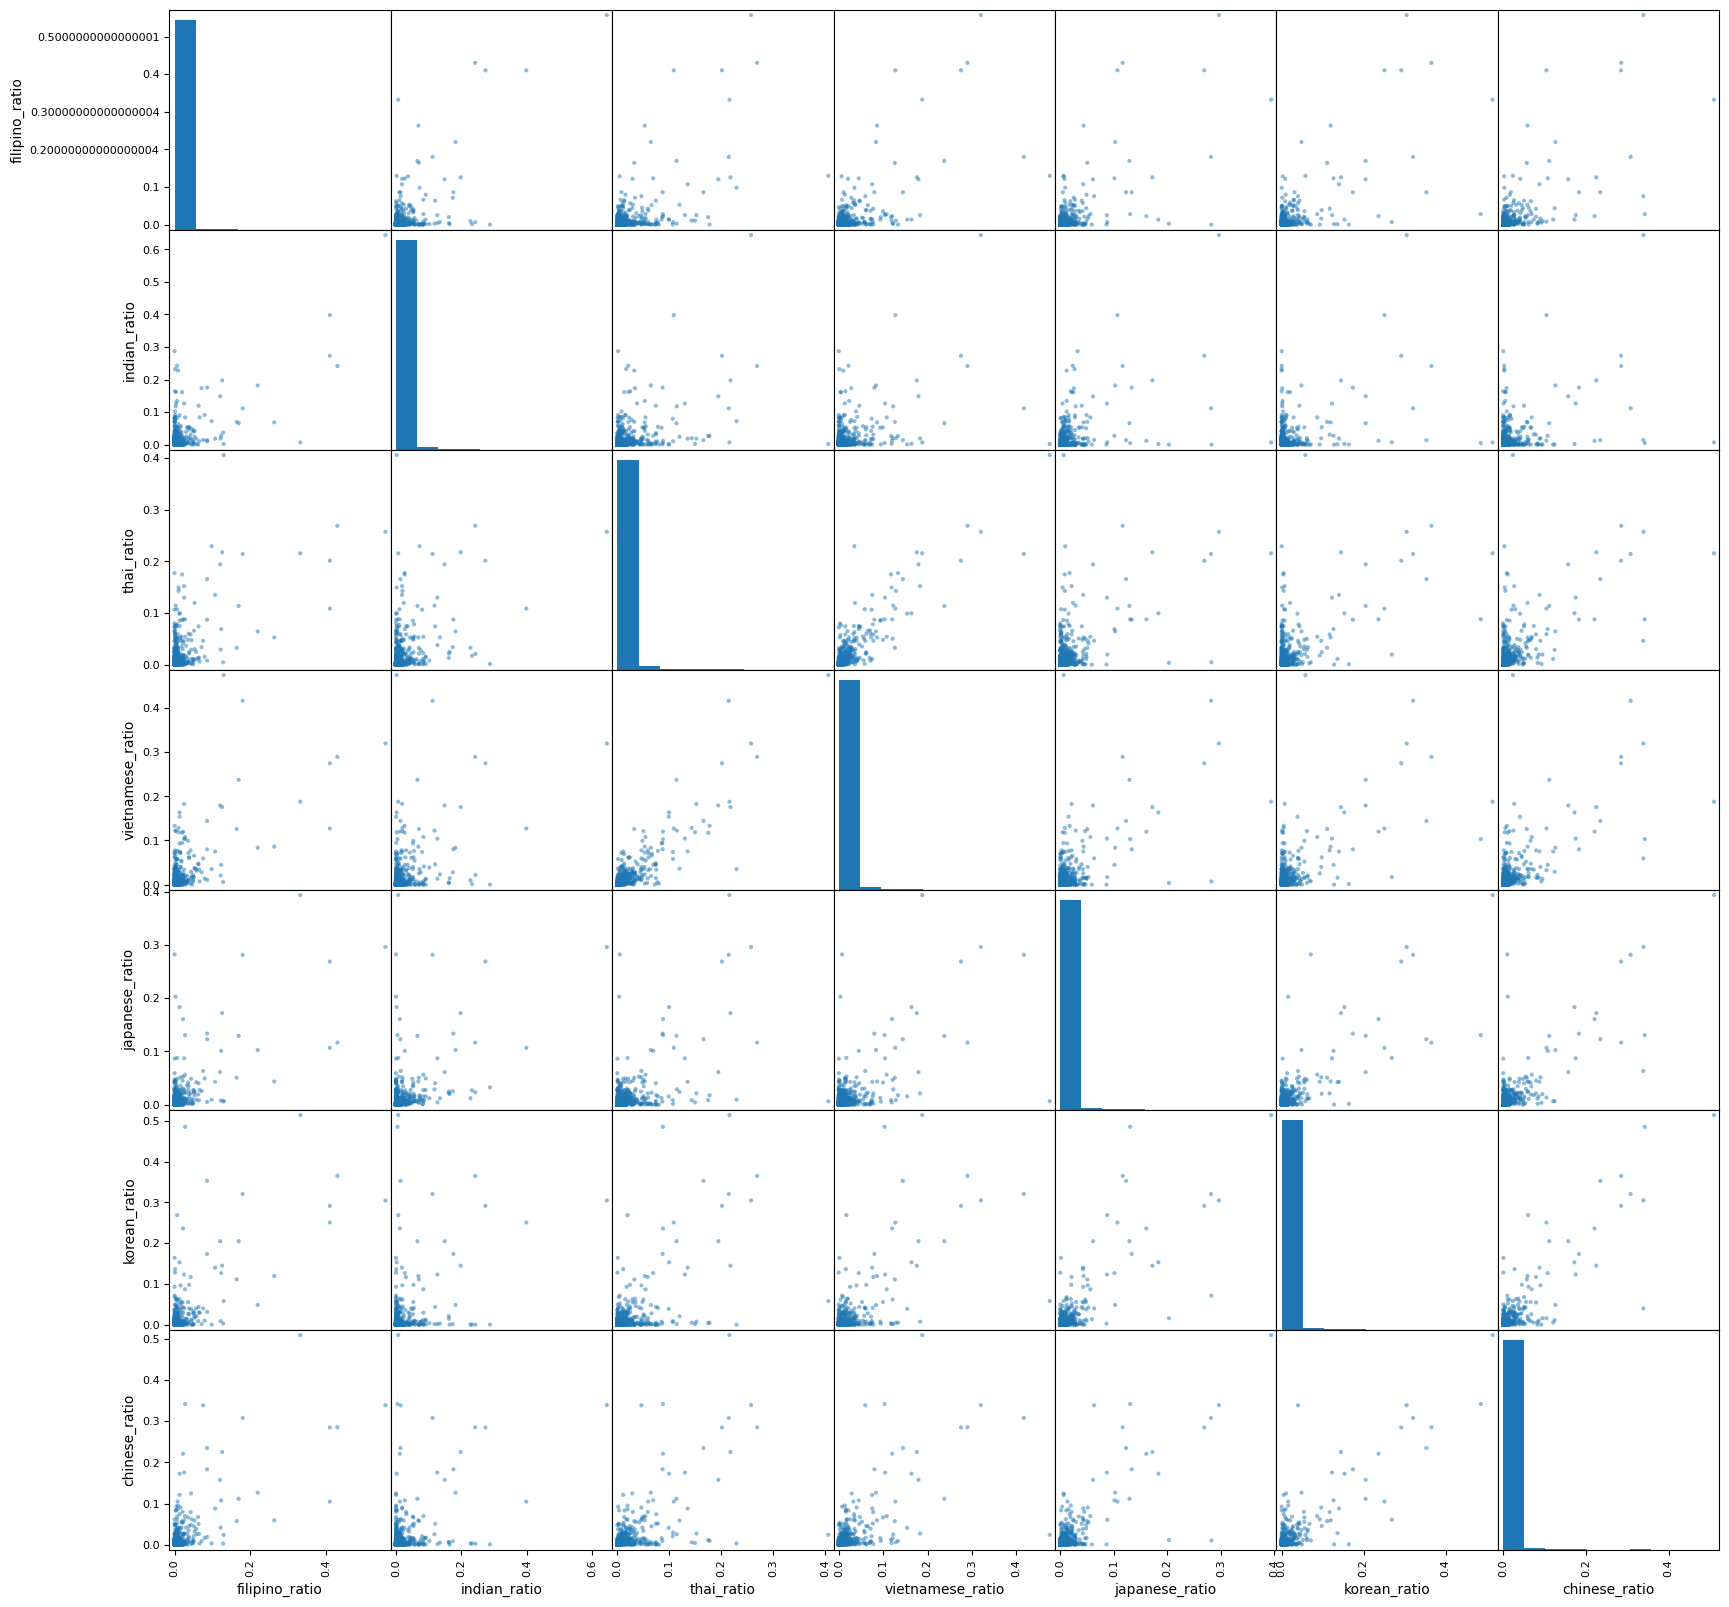

In [54]:

pd.plotting.scatter_matrix(cuisine_df[rlist(asians)],figsize=[20,20])

array([[<AxesSubplot: xlabel='southern_us_ratio', ylabel='southern_us_ratio'>,
        <AxesSubplot: xlabel='jamaican_ratio', ylabel='southern_us_ratio'>,
        <AxesSubplot: xlabel='mexican_ratio', ylabel='southern_us_ratio'>,
        <AxesSubplot: xlabel='brazilian_ratio', ylabel='southern_us_ratio'>,
        <AxesSubplot: xlabel='cajun_creole_ratio', ylabel='southern_us_ratio'>],
       [<AxesSubplot: xlabel='southern_us_ratio', ylabel='jamaican_ratio'>,
        <AxesSubplot: xlabel='jamaican_ratio', ylabel='jamaican_ratio'>,
        <AxesSubplot: xlabel='mexican_ratio', ylabel='jamaican_ratio'>,
        <AxesSubplot: xlabel='brazilian_ratio', ylabel='jamaican_ratio'>,
        <AxesSubplot: xlabel='cajun_creole_ratio', ylabel='jamaican_ratio'>],
       [<AxesSubplot: xlabel='southern_us_ratio', ylabel='mexican_ratio'>,
        <AxesSubplot: xlabel='jamaican_ratio', ylabel='mexican_ratio'>,
        <AxesSubplot: xlabel='mexican_ratio', ylabel='mexican_ratio'>,
        <AxesSubplot:

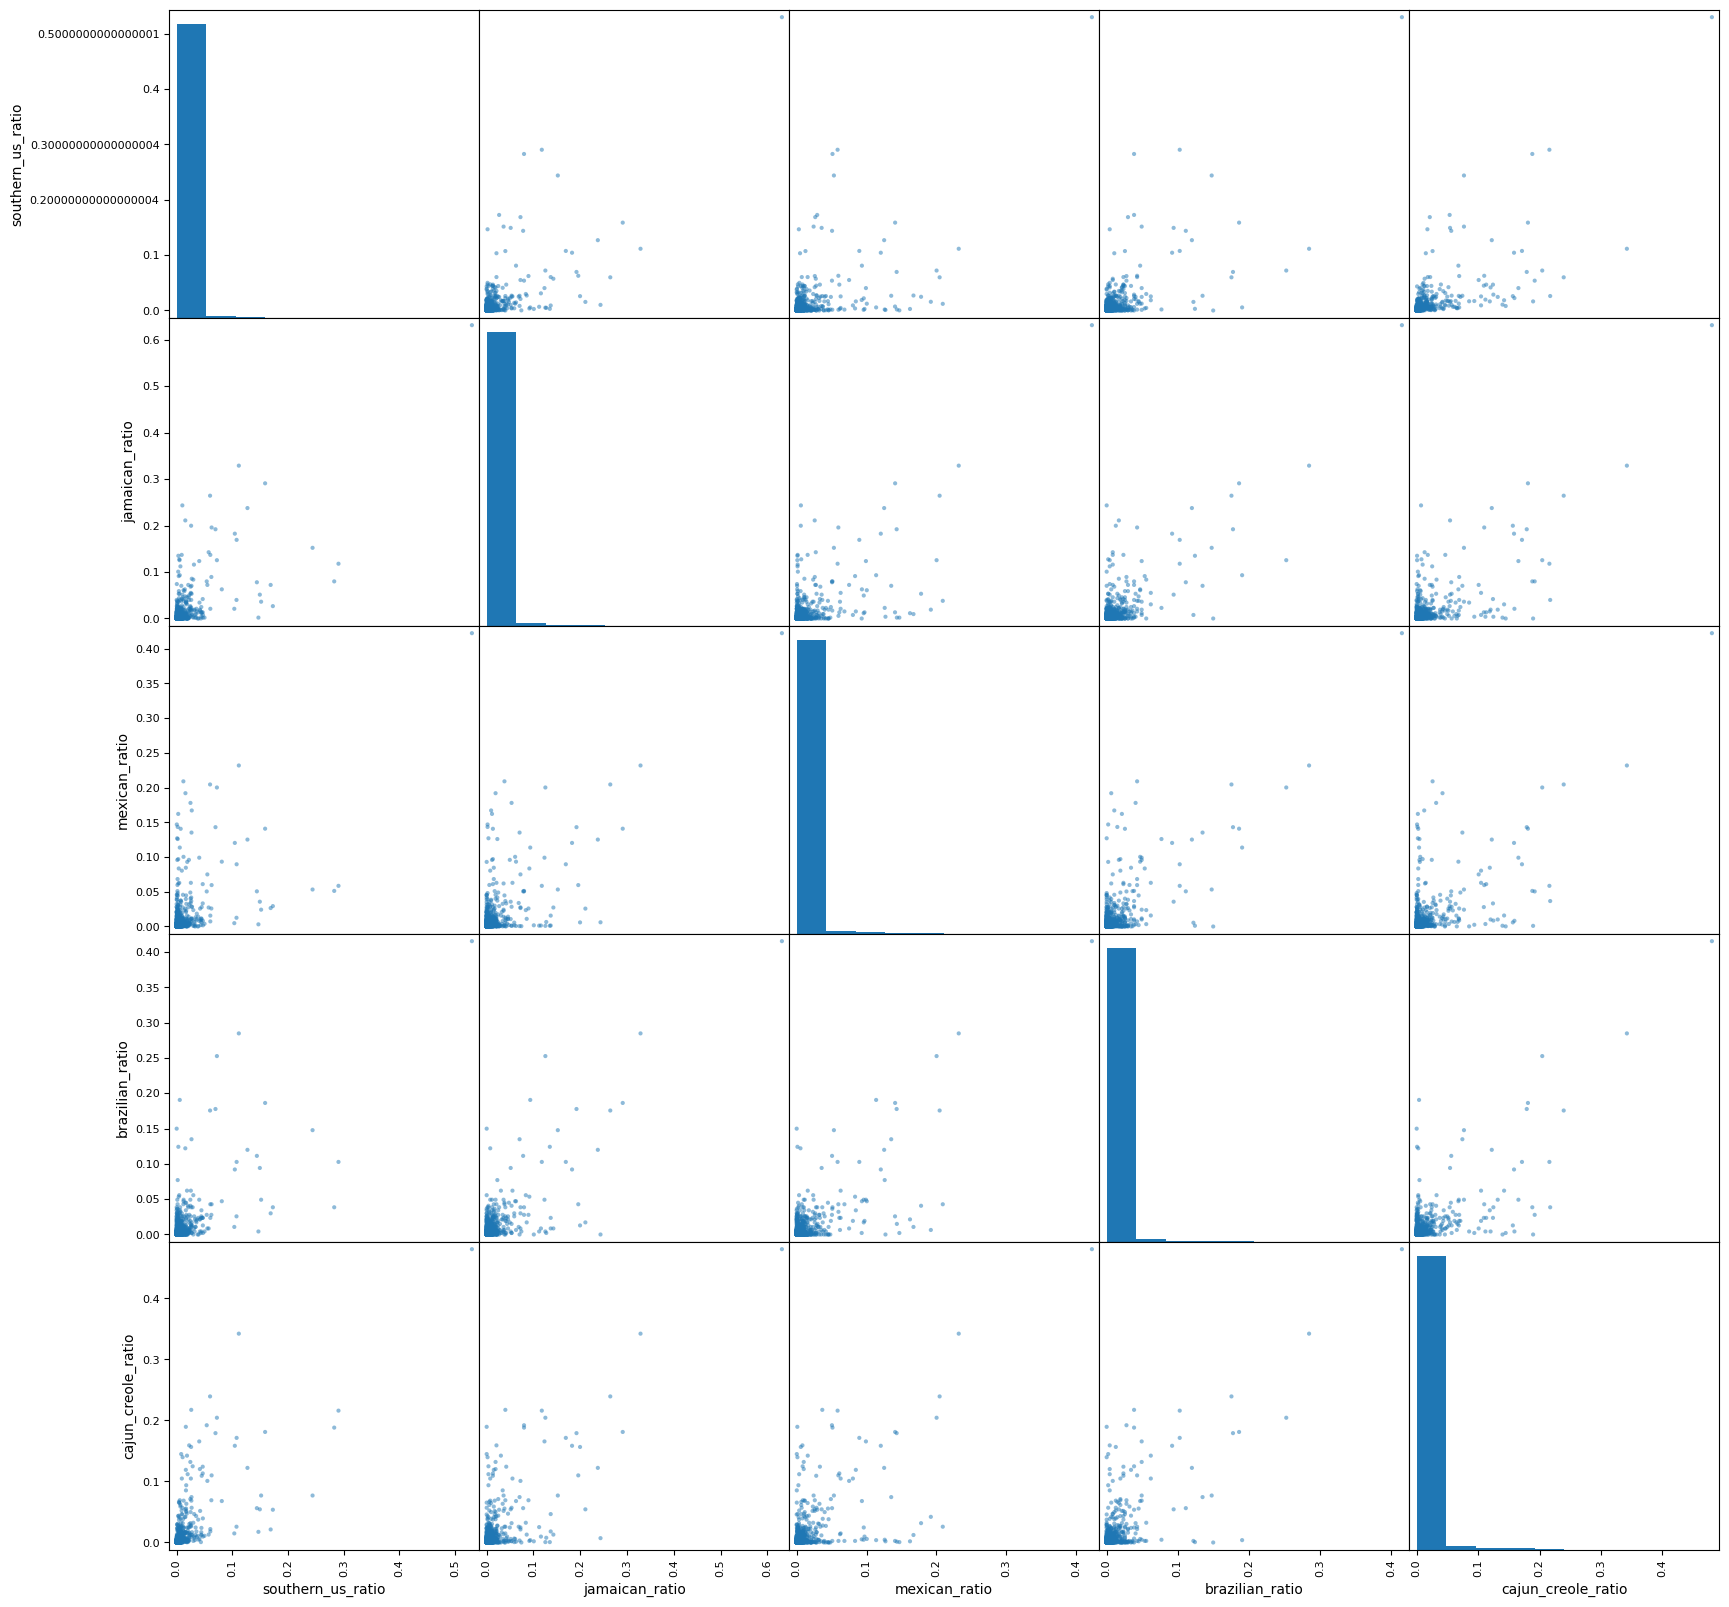

In [56]:
pd.plotting.scatter_matrix(cuisine_df[rlist(americans)],figsize=[20,20])

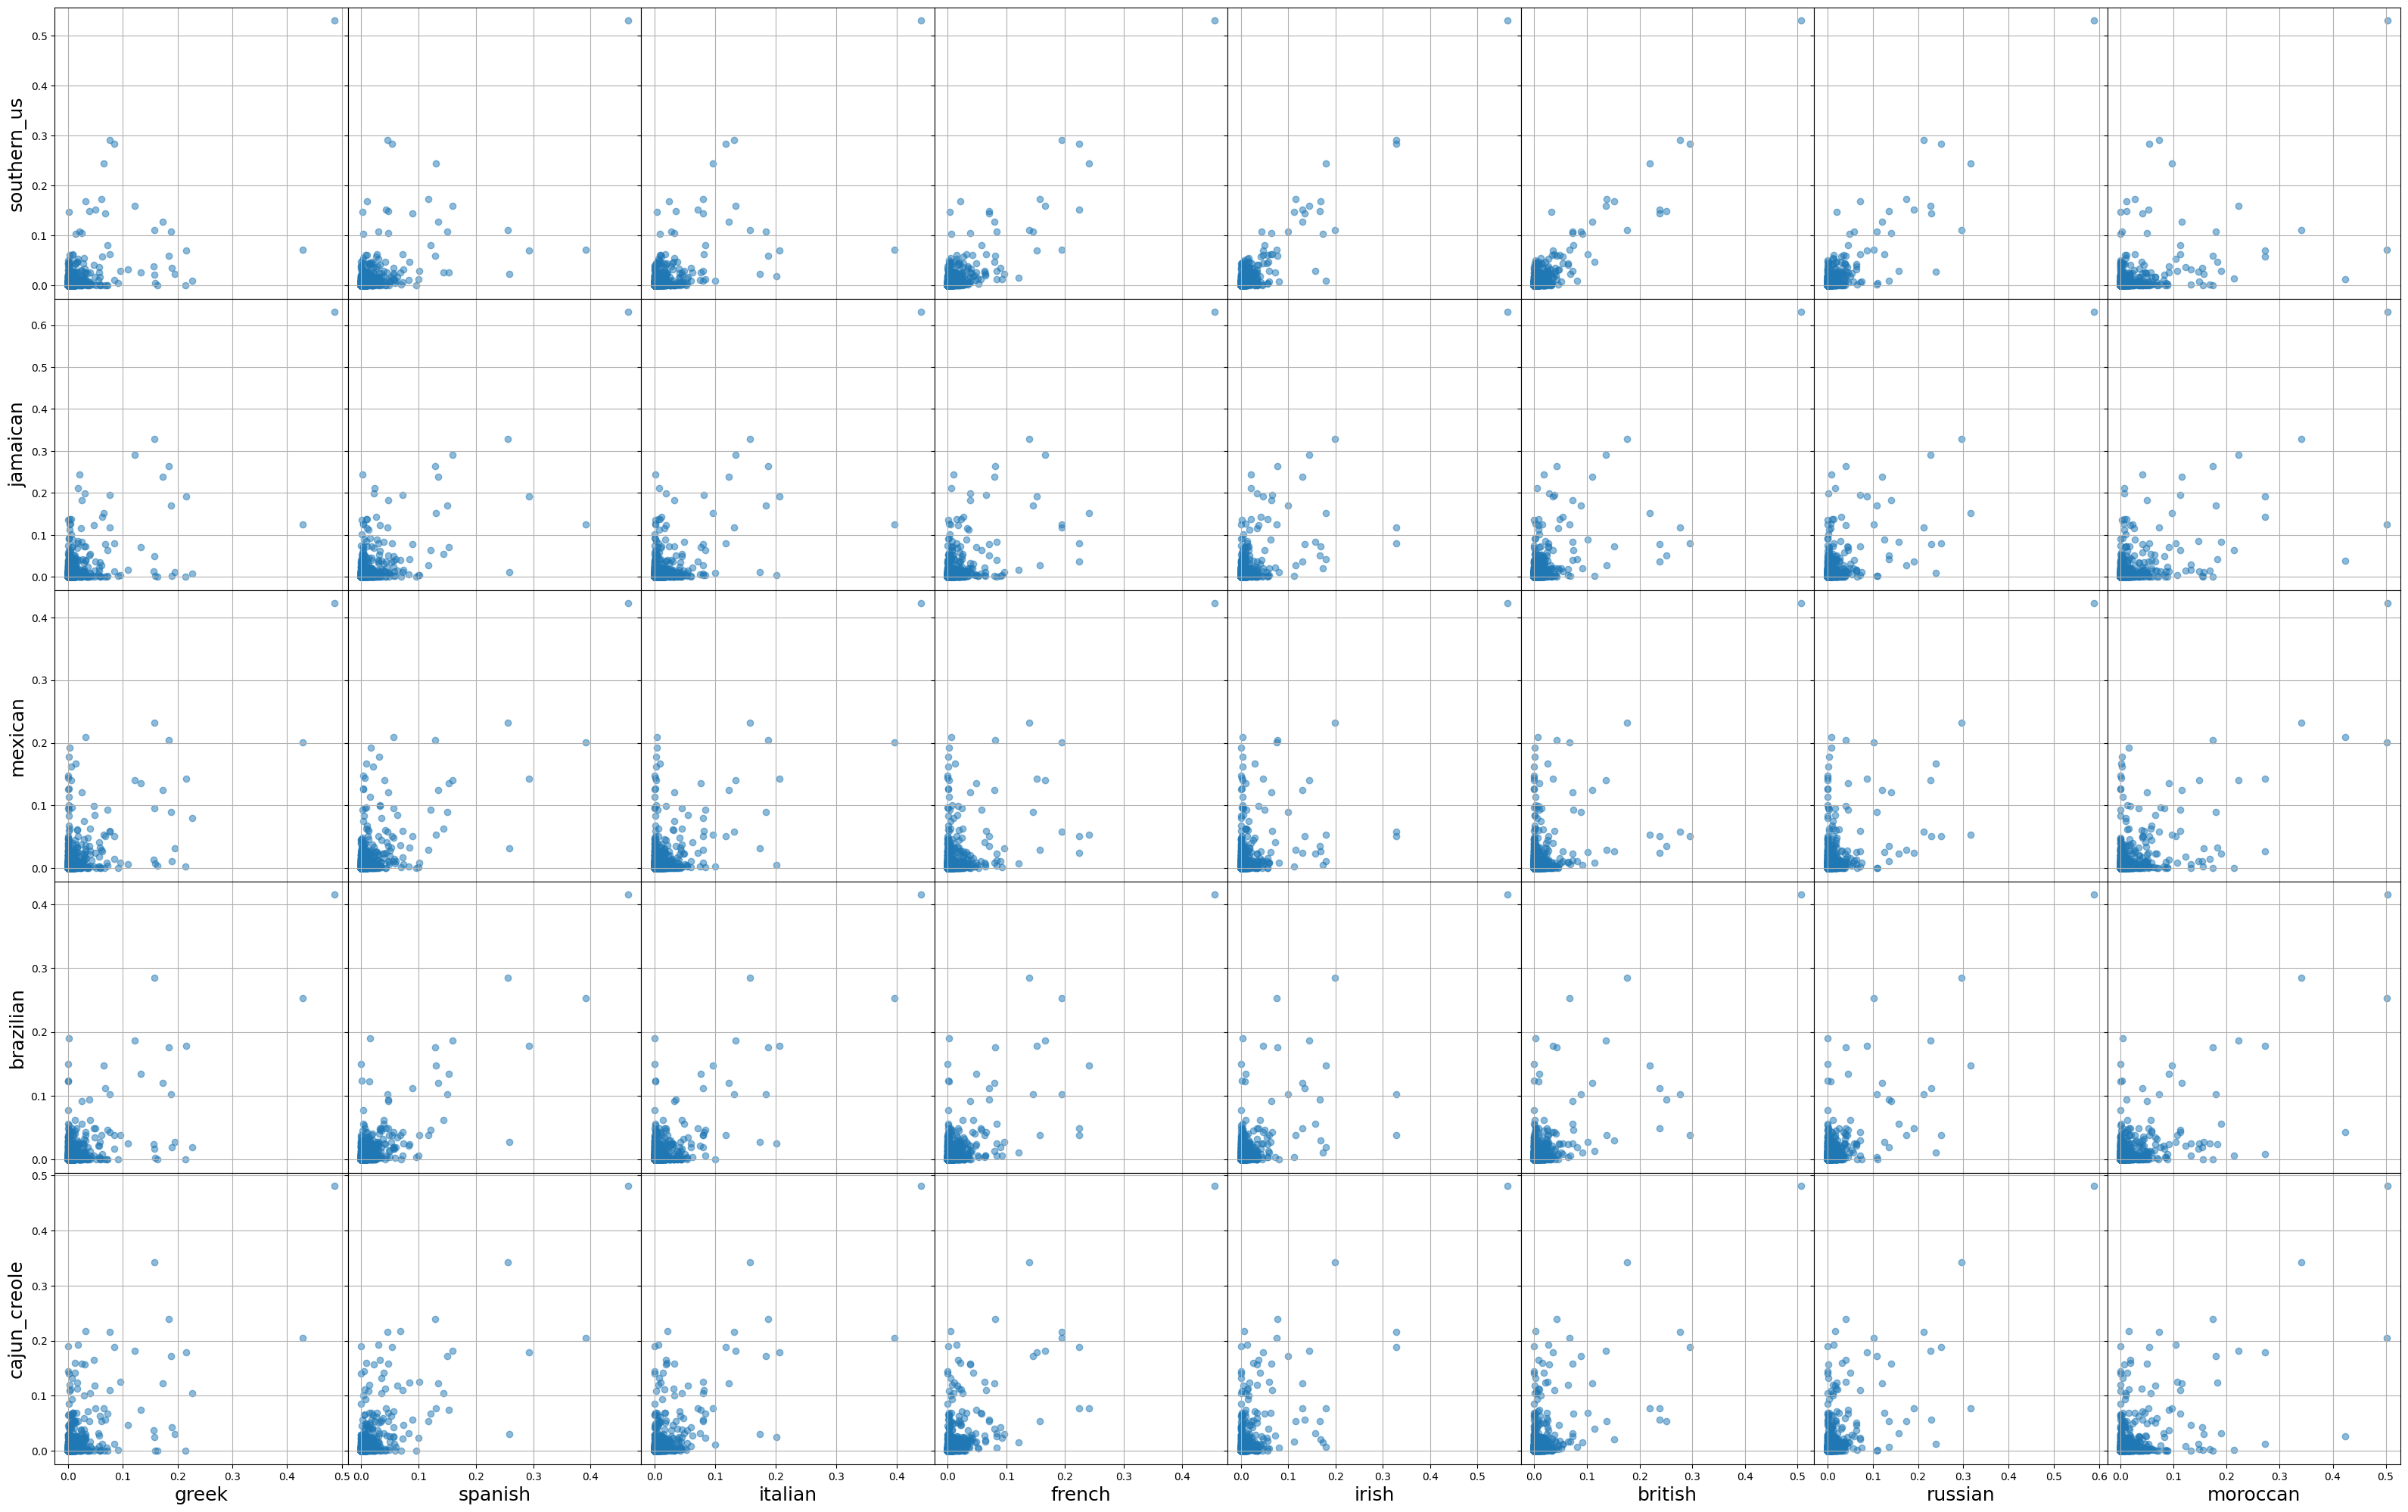

In [94]:
plt.style.use('default')
def martix_scatter(group1,group2,plotsize = (5,5)):
    fig, axs = plt.subplots(len(group2),len(group1), figsize = (plotsize[0]*len(group1),plotsize[1]*len(group2)))
    
    
    for i,e in enumerate(rlist(group1)):
        for j,a in enumerate(rlist(group2)):
            axs[j][i].scatter(cuisine_df[e],cuisine_df[a], alpha = 0.5)
            axs[j][i].grid()
            
            if j != len(group2)-1:
                axs[j][i].set_xticklabels([])
            else:
                axs[j][i].set_xlabel(group1[i], fontsize = 18)
            if i != 0:
                axs[j][i].set_yticklabels([])
            else:
                axs[j][i].set_ylabel(group2[j], fontsize = 18)
                
    plt.subplots_adjust(wspace=0, hspace=0)

martix_scatter(europeans,americans)

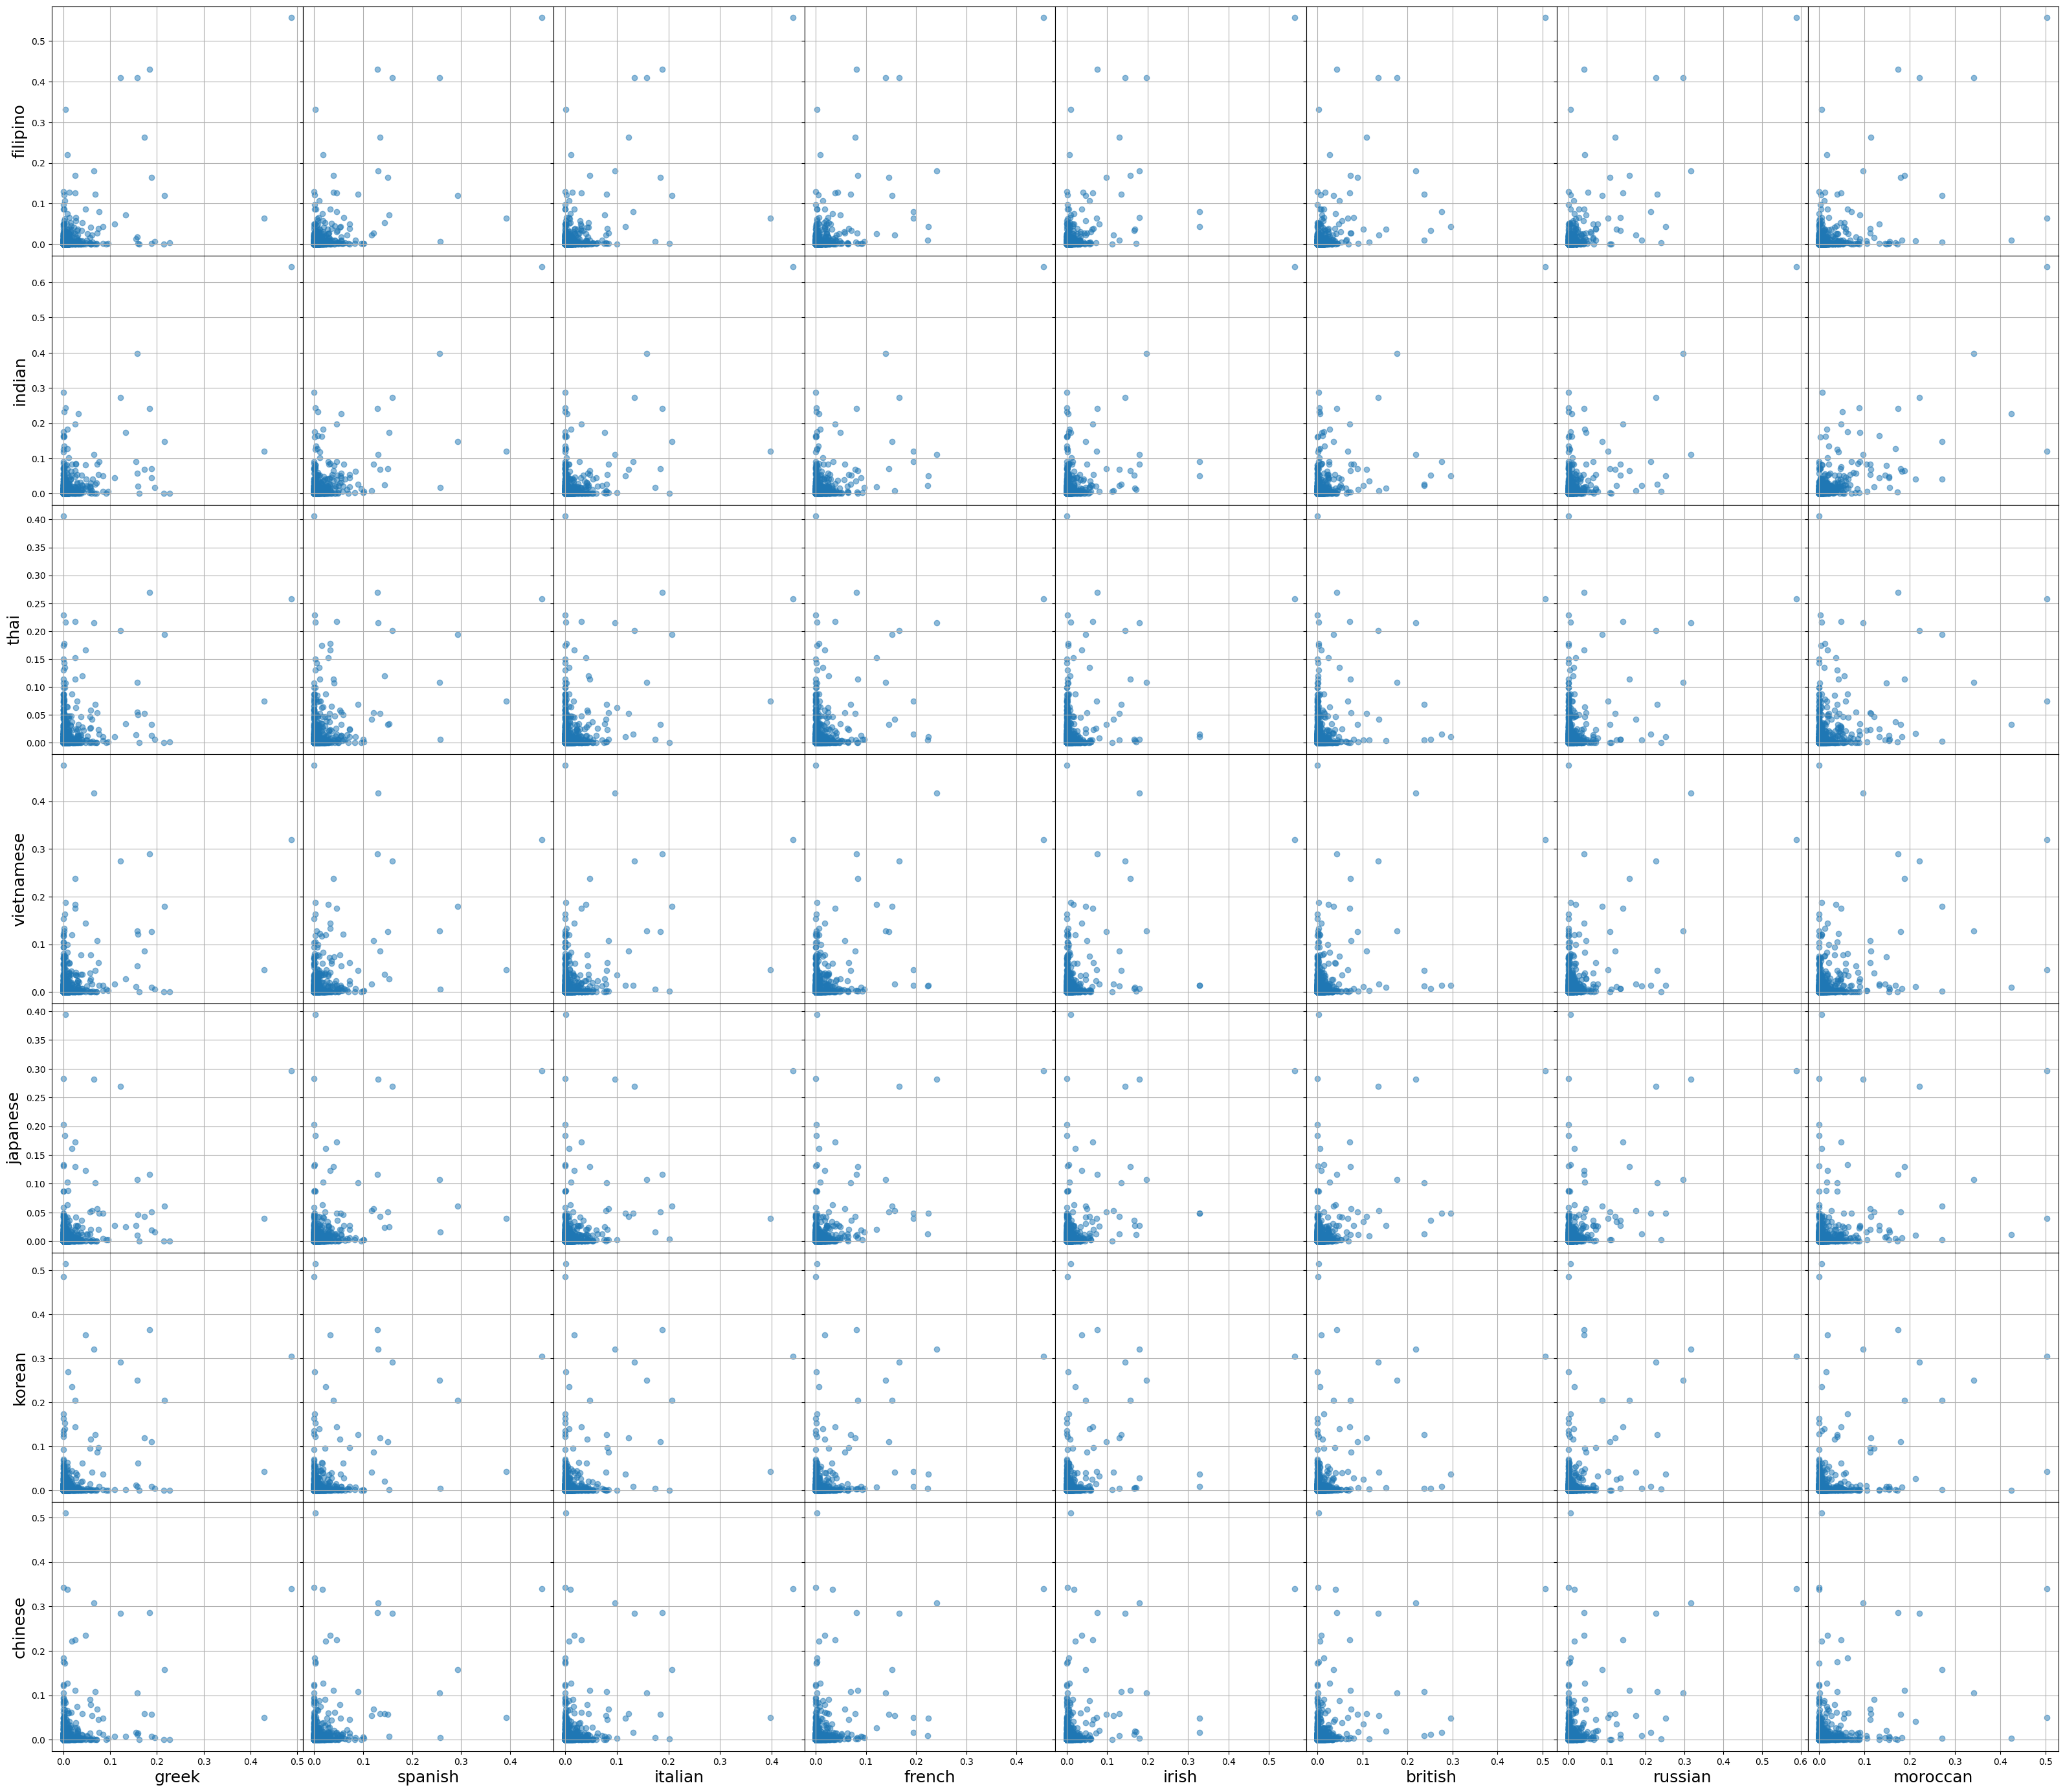

In [95]:
martix_scatter(europeans,asians)

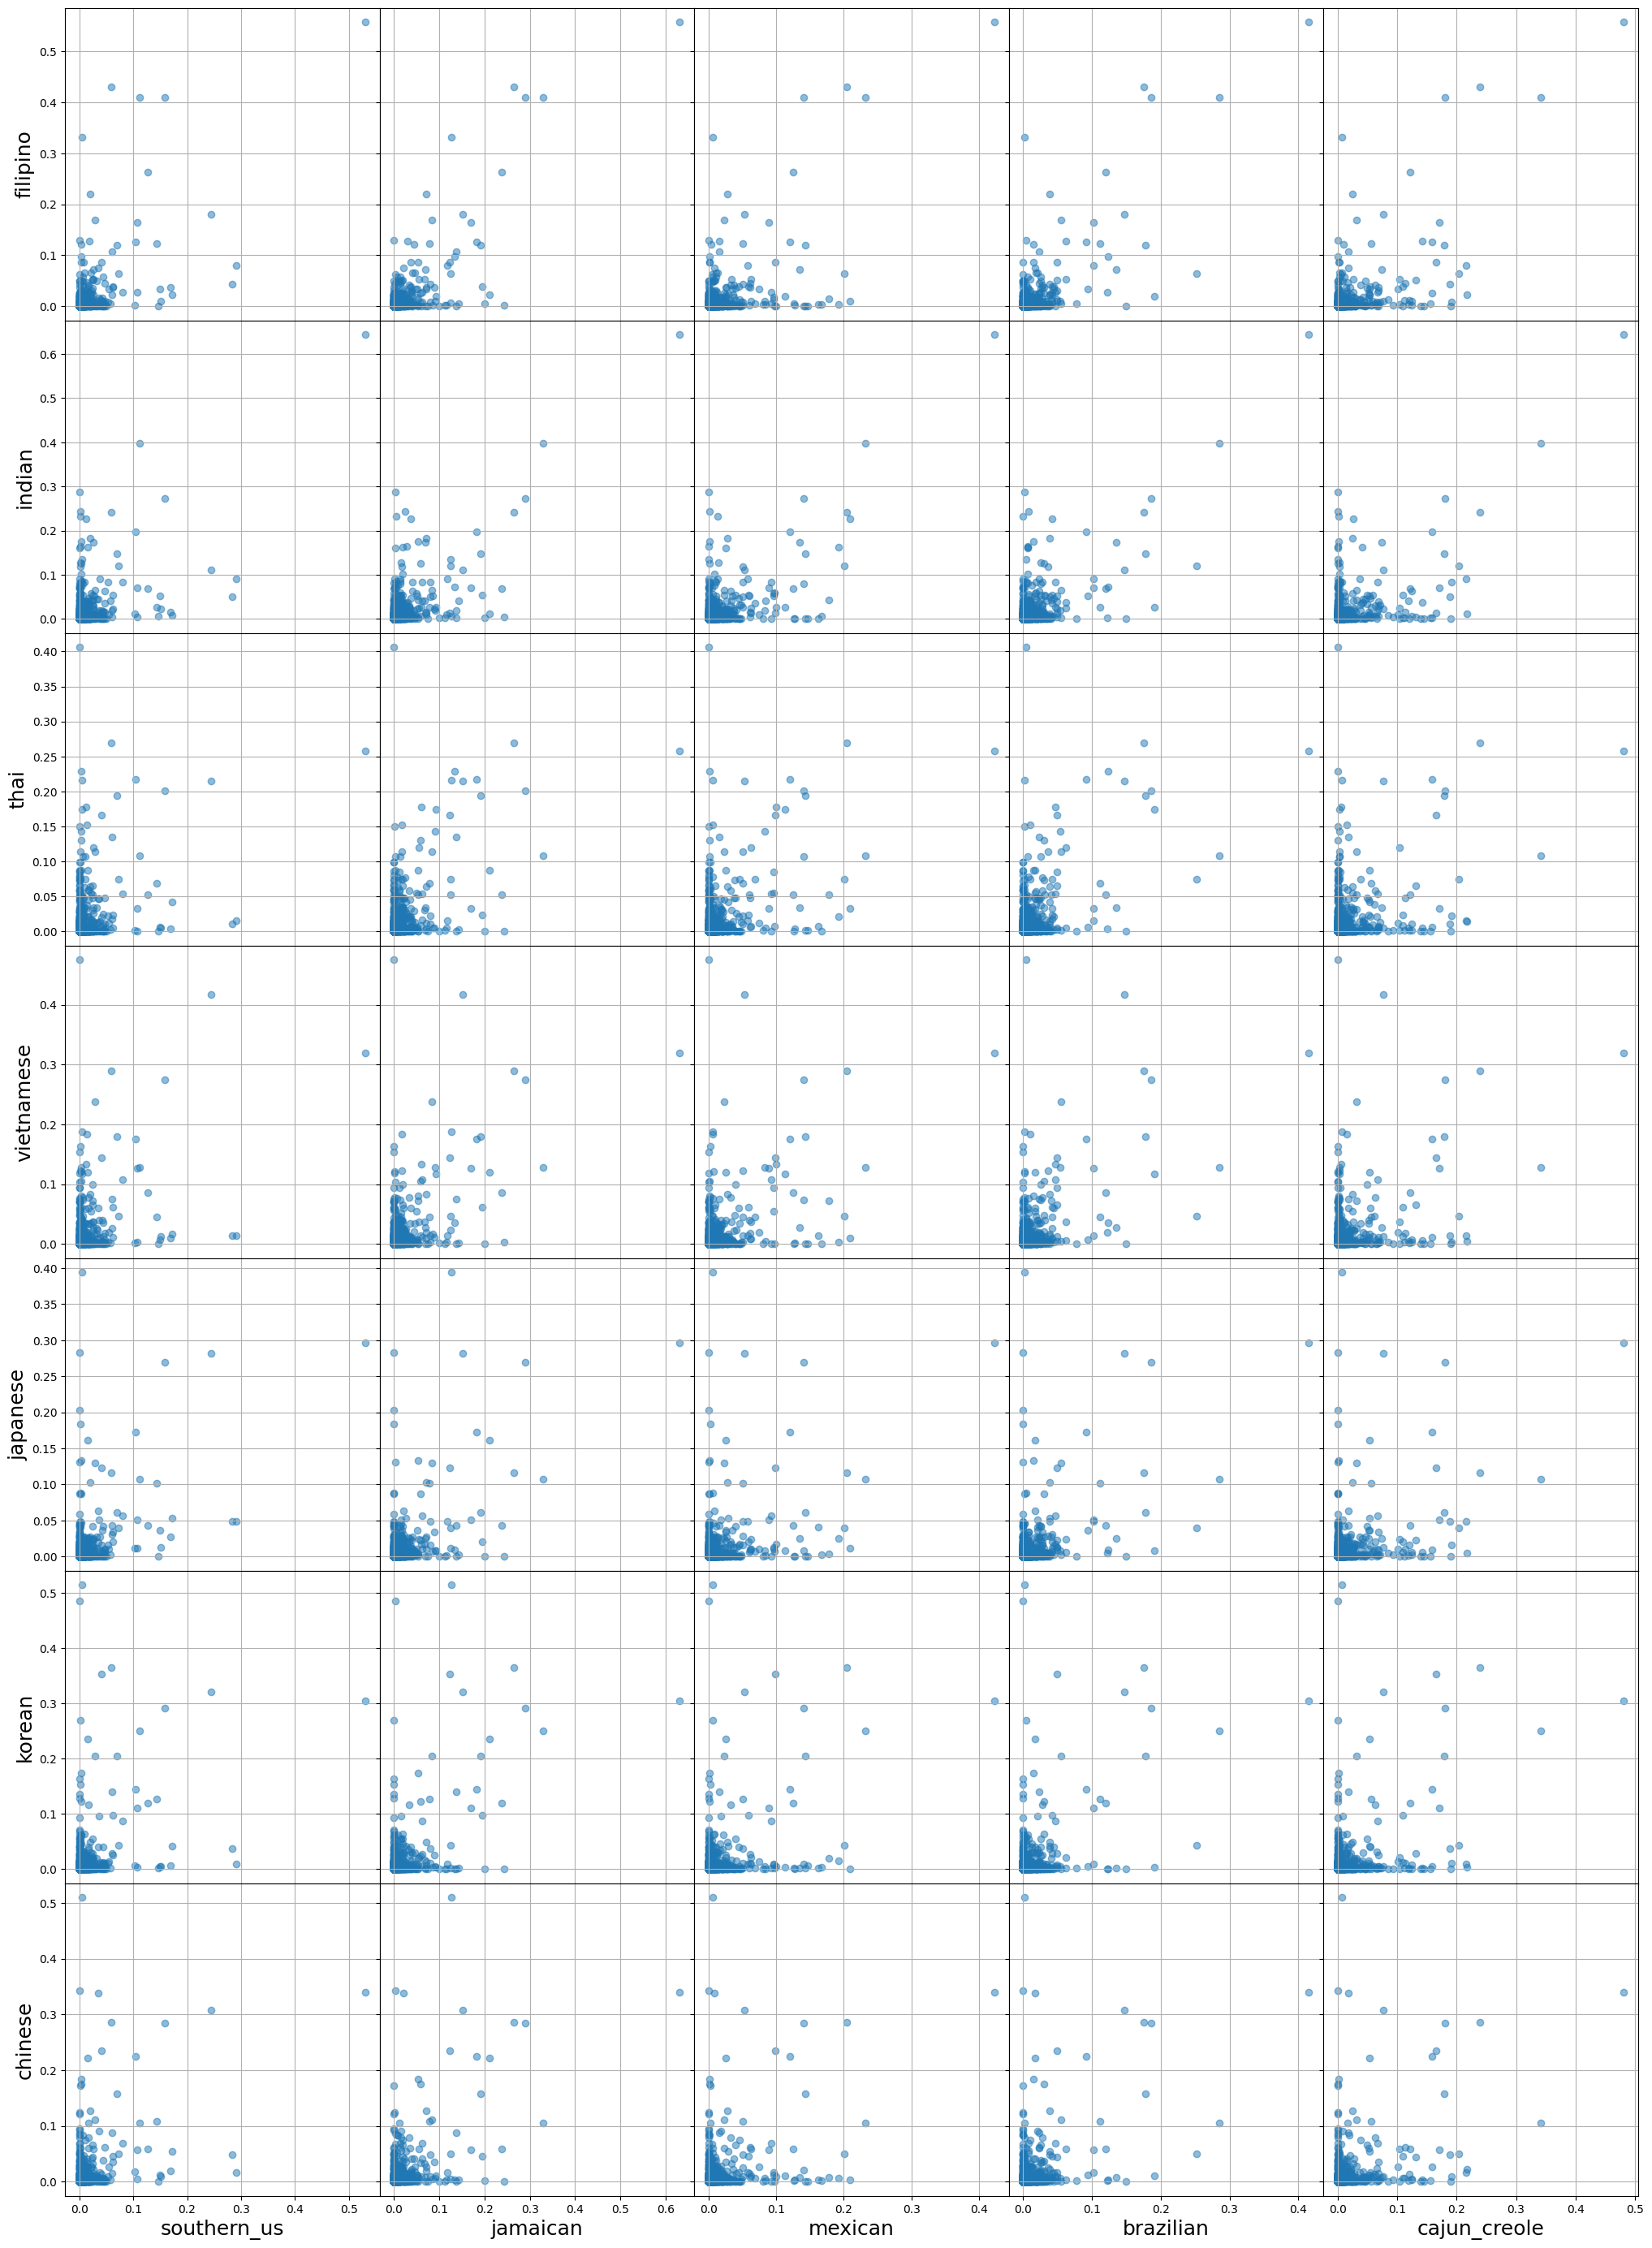

In [96]:
martix_scatter(americans,asians)

Find similarity measures between different cousines and which had larger influance ont the other 

In [19]:

#Pearson correlation
#Spearman correlation
#Kendall's W


<AxesSubplot: >

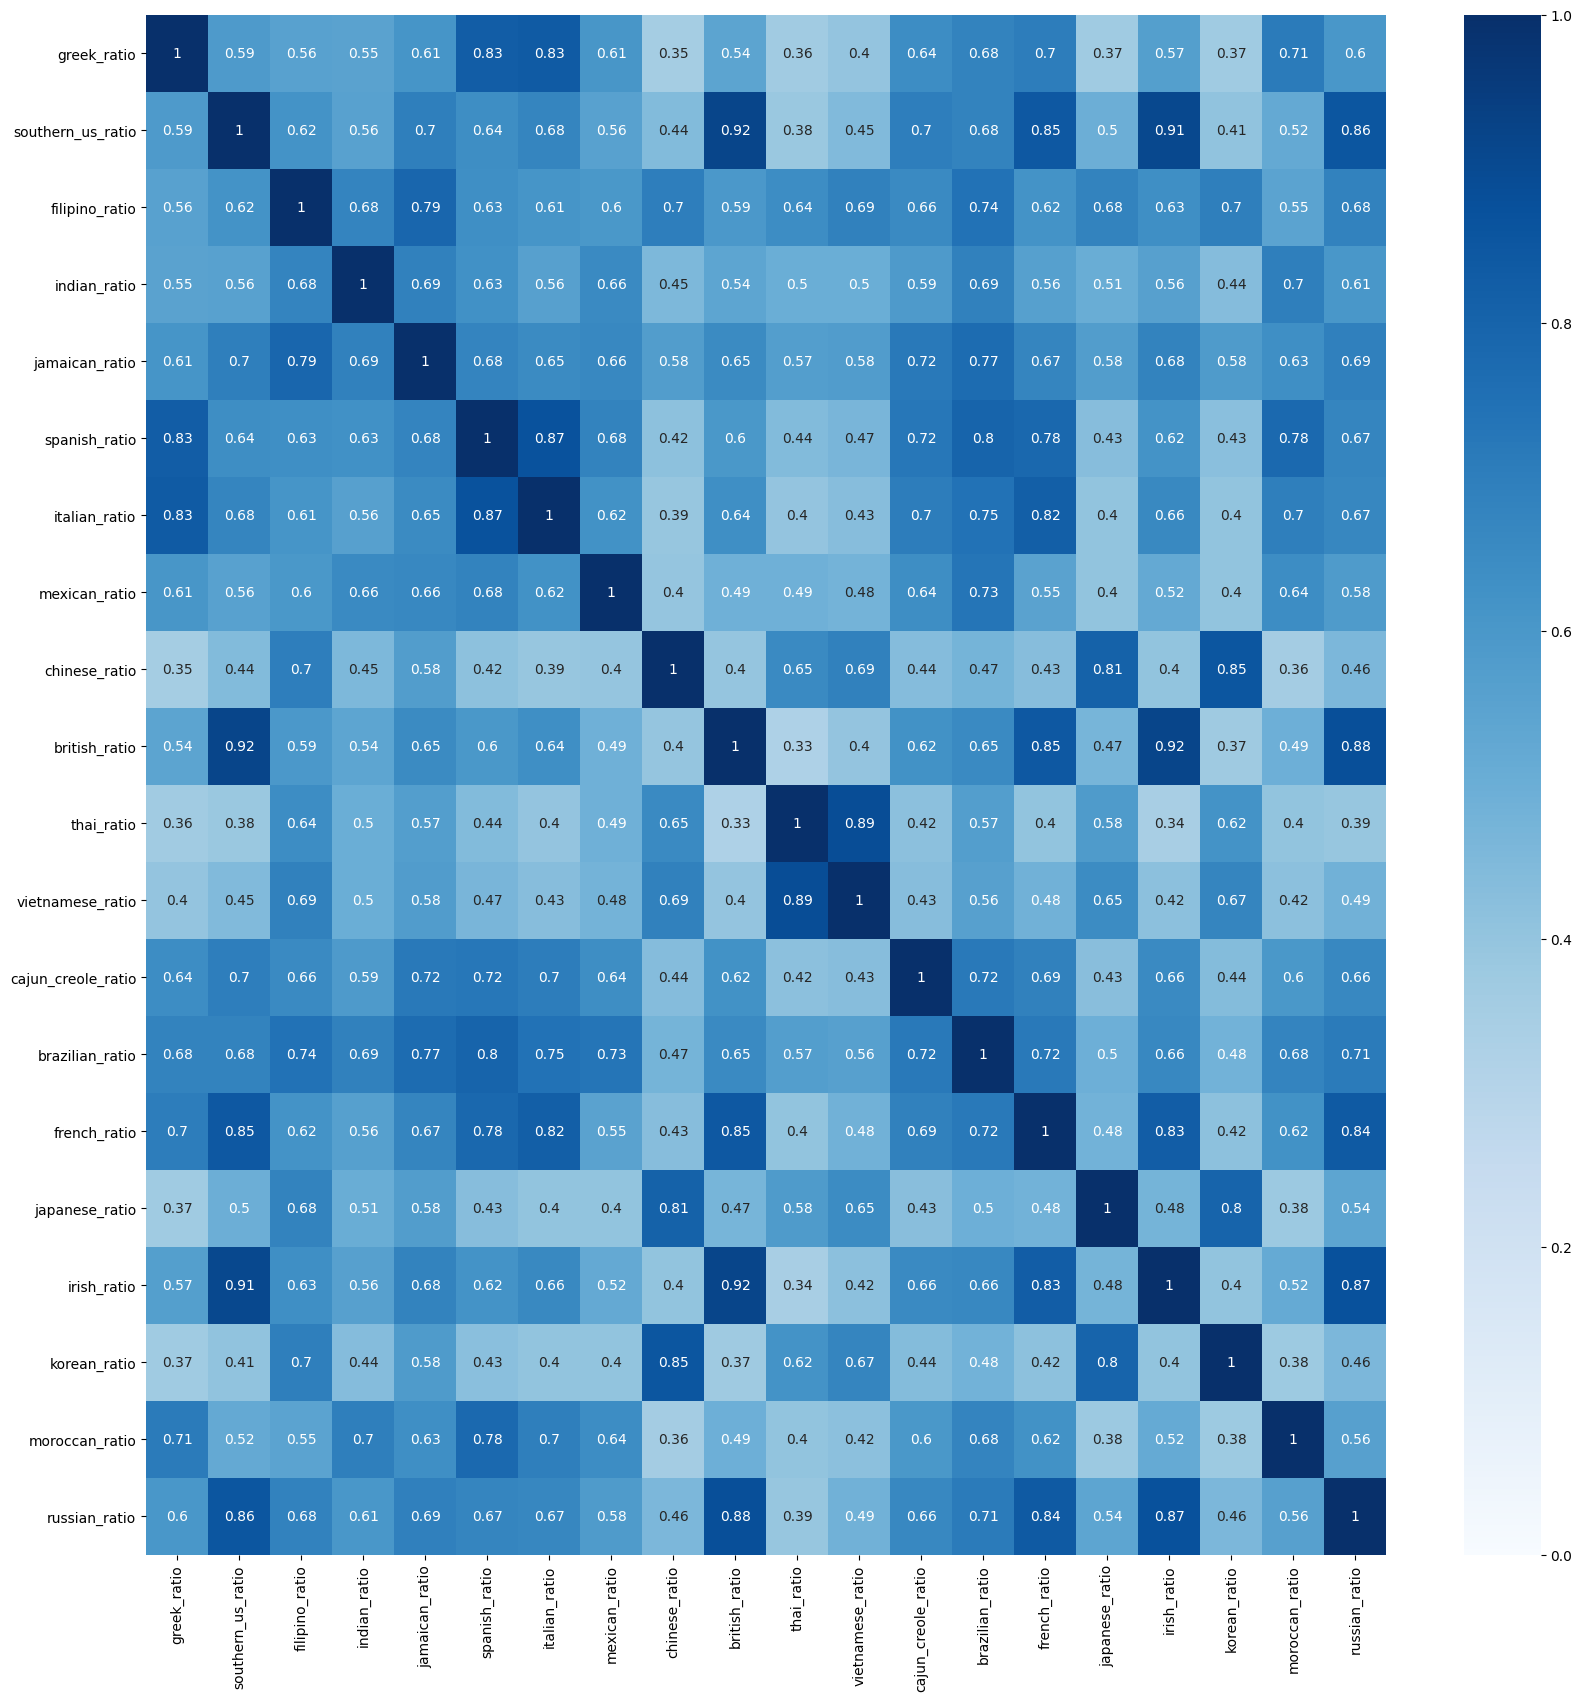

In [101]:
ratio_df = cuisine_df[rlist(cuisines)]
spearman_corr = ratio_df.corr()
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(spearman_corr, ax = ax,vmin= 0, vmax= 1, cmap="Blues", annot = True)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [64.375, 64.375, 113.75, 113.75],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [89.0625, 89.0625, 167.5, 167.5],
  [21.25, 21.25, 128.28125, 128.28125]],
 'dcoord': [[0.0, 0.11314004761581342, 0.11314004761581342, 0.0],
  [0.0, 0.14650493319950253, 0.14650493319950253, 0.0],
  [0.0, 0.20219645958890986, 0.20219645958890986, 0.14650493319950253],
  [0.11314004761581342,
   0.41774529270309446,
   0.41774529270309446,
   0.20219645958890986],
  [0.0, 0.07817747665510655, 0.07817747665510655, 0.0],
  [0.0, 0.09078695982268015, 0.09078695982268015, 

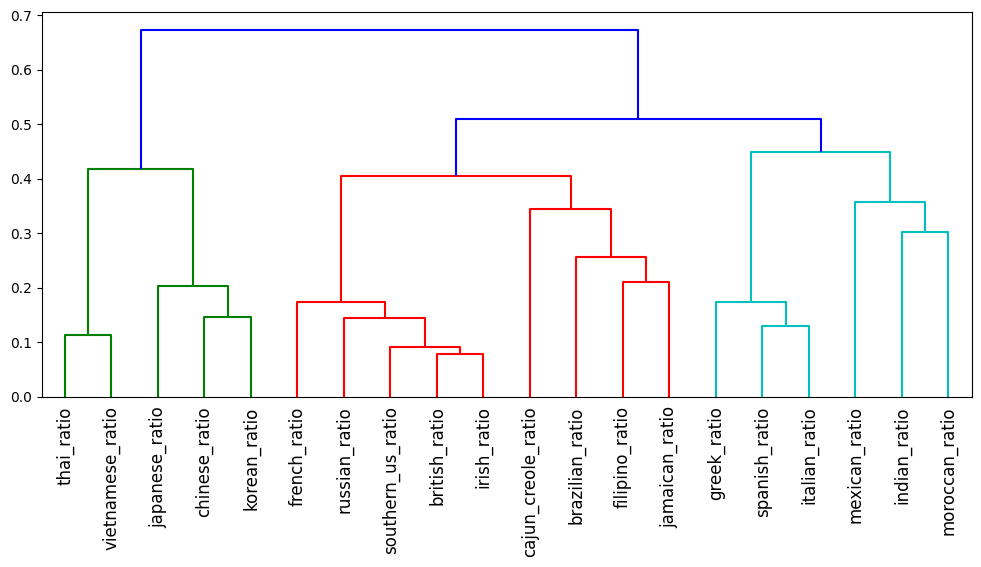

In [103]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
# Hierarchical Clustering
# https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering/notebook

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(spearman_corr)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=ratio_df.columns, orientation='top', 
           leaf_rotation=90)

In [115]:
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

<AxesSubplot: >

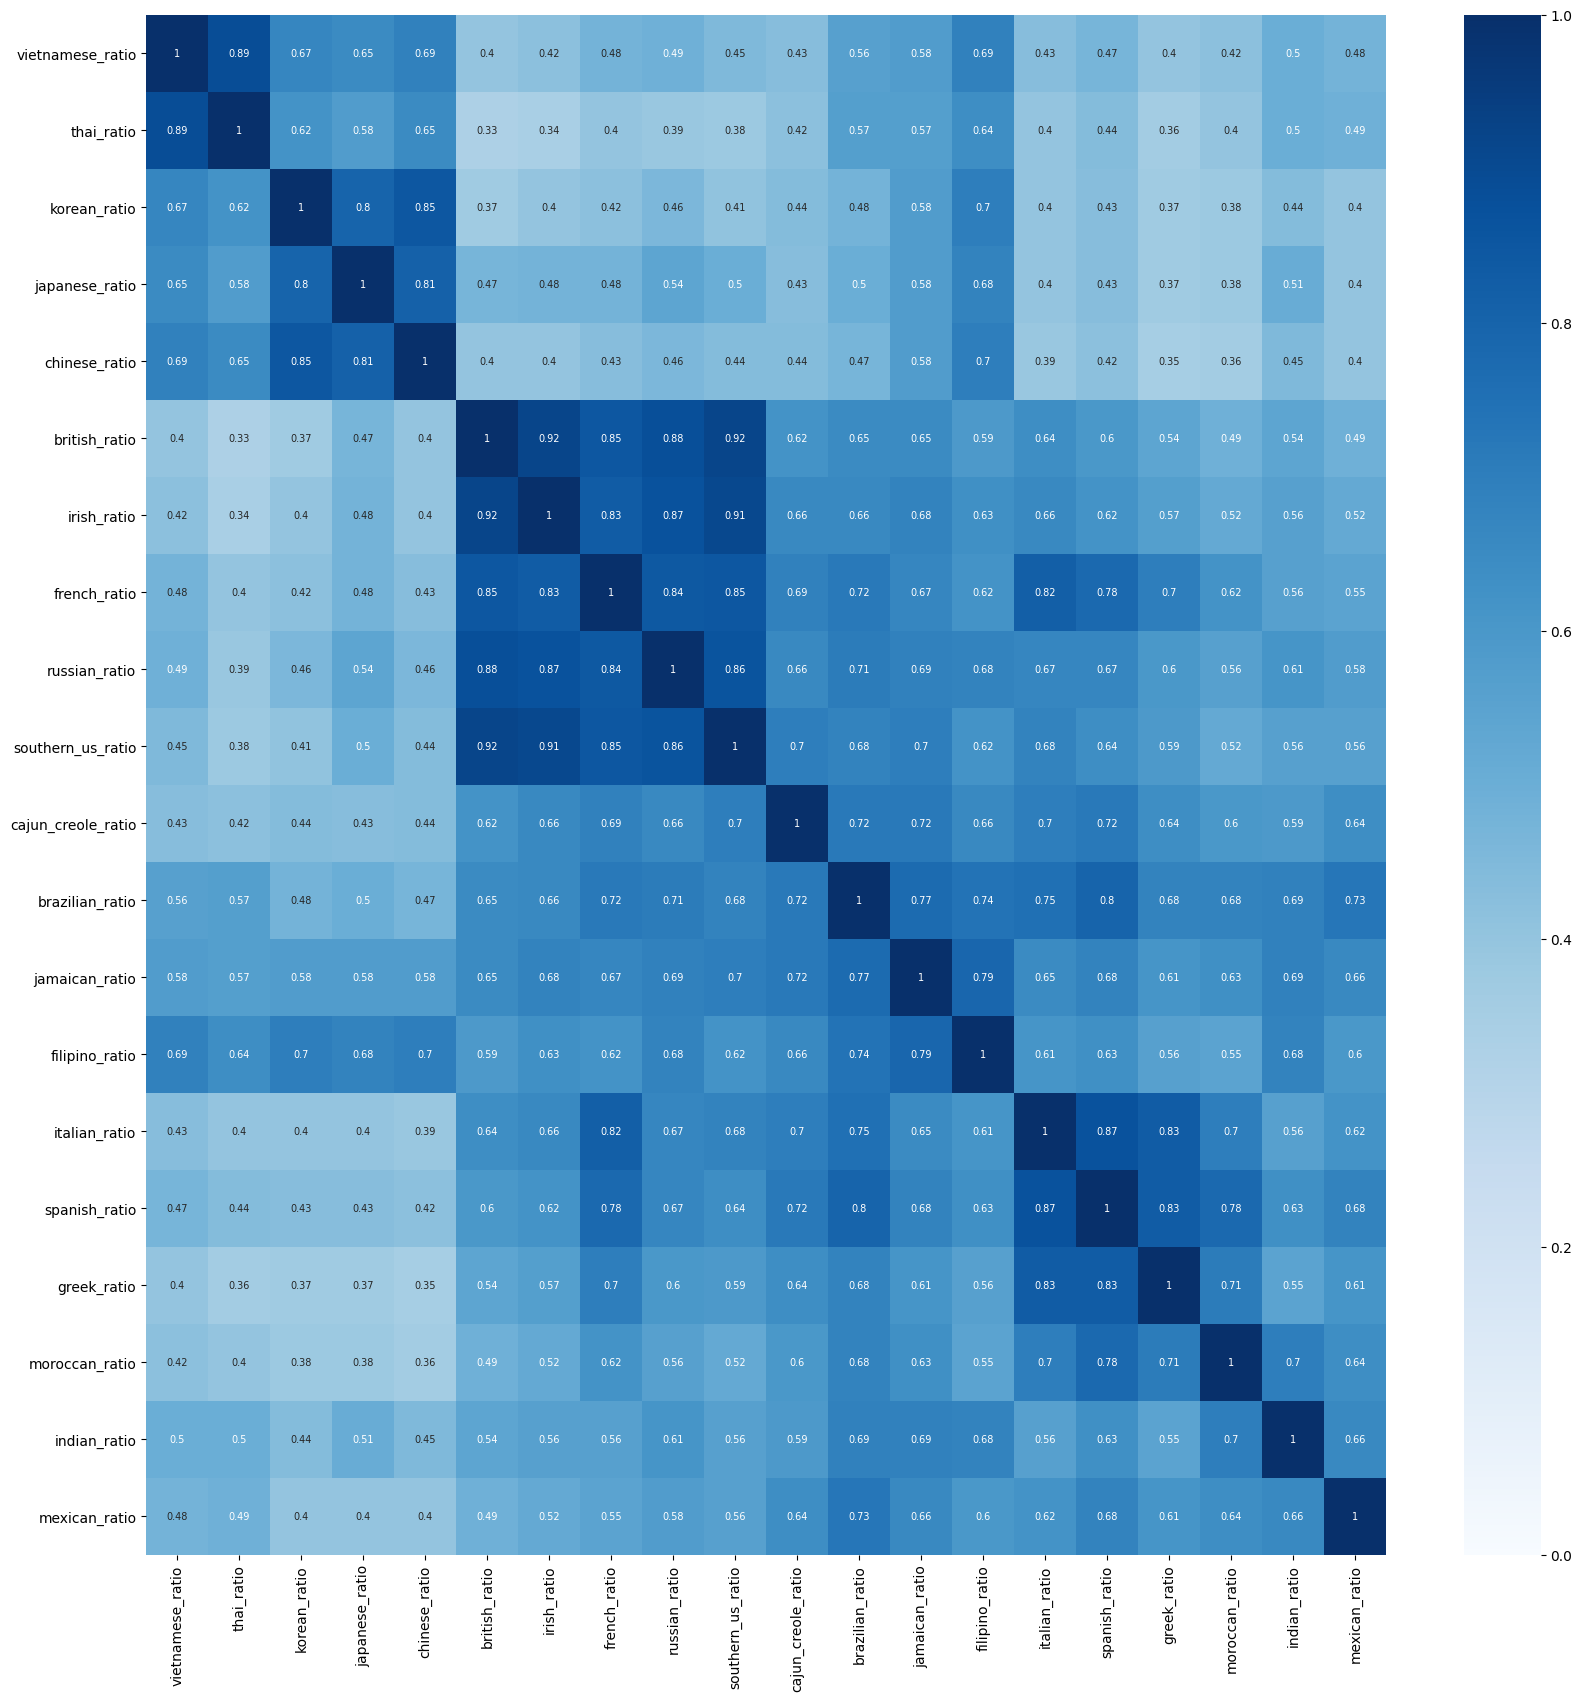

In [116]:
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(ratio_df.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(ratio_df[i])
    else:
        df_to_append = pd.DataFrame(ratio_df[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

plt.figure(figsize=(20,20))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='Blues', annot=True, 
            annot_kws={"size": 7}, vmin=0, vmax=1)